In [107]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
import re

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

In [230]:
subway_station = pd.read_csv('./data/subway/CARD_SUBWAY_MONTH_201912.csv',encoding="EUC-KR")
subway_station

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093.0,17141.0,20191204
1,20191201,1호선,종로3가,19646.0,17772.0,20191204
2,20191201,1호선,종로5가,13716.0,13149.0,20191204
3,20191201,1호선,동대문,11040.0,13079.0,20191204
4,20191201,1호선,신설동,8498.0,8322.0,20191204
...,...,...,...,...,...,...
18328,20191231,9호선,사평,3525.0,3391.0,20200103
18329,20191231,9호선,신논현,38032.0,38915.0,20200103
18330,20191231,공항철도 1호선,서울역,15568.0,13292.0,20200103
18331,20191231,공항철도 1호선,공덕,2488.0,3261.0,20200103


In [231]:
subway_station['사용일자'].unique()

array([20191201, 20191202, 20191203, 20191204, 20191205, 20191206,
       20191207, 20191208, 20191209, 20191210, 20191211, 20191212,
       20191213, 20191214, 20191215, 20191216, 20191217, 20191218,
       20191219, 20191220, 20191221, 20191222, 20191223, 20191224,
       20191225, 20191226, 20191227, 20191228, 20191229, 20191230,
       20191231], dtype=int64)

In [232]:
len(subway_station['역명'].unique())

509

In [233]:
subway_pos = pd.read_csv('./data/subway/subway_crd_line_info-main/지하철역_좌표.csv')
subway_pos

,역이름,y,x
0,인천공항1터미널,37.447688,126.452577
1,인천공항2터미널,37.467617,126.434742
2,이수,37.486683,126.981902
3,송파나루,37.510449,127.112249
4,한성백제,37.516502,127.116259
...,...,...,...
594,동백,37.269043,127.152716
595,초당,37.260752,127.159443
596,삼가,37.242115,127.168075
597,시청·용인대,37.239151,127.178406


In [234]:
subway_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역이름     599 non-null    object 
 1   y       599 non-null    float64
 2   x       599 non-null    float64
dtypes: float64(2), object(1)
memory usage: 14.2+ KB


In [237]:
subway_pos = subway_pos.rename(columns={'역이름':'역명'})

In [238]:
regex = "\(.*\)|\s-\s.*"

In [239]:
# subway_pos_name = subway_pos['역명']
subway_station_name = subway_station['역명'].unique()

subway_station['역명']= pd.Series([re.sub(regex,'',row) for row in subway_station['역명']])

In [240]:
# inner join 진행 시 서로에게 없는 역들은 정보가 사라진다.
# join 진행 시 결측치들을 찾아보자.

ss = set(subway_station['역명'])
sp = set(subway_pos['역명'])
only_ss = ss-sp # subway_station에만 있는 역이름들이다.
only_sp = sp-ss # subway_pos에만 있는 역이름들이다.
display(len(only_ss))
display(len(only_sp))
display(len(ss & sp))
display(len(ss | sp))

0

90

509

599

6월 한달 간의 지하철 역별 이용객 수이다.

In [244]:
subway_station_data1 = subway_station.merge(subway_pos,how='right',left_on='역명',right_on='역명')
display(subway_station_data1)
# 좌표는 있으나 승객 정보가 없는 경우이다.
# 차후에 데이터를 채워넣던가 해야할듯 싶다.
# display(only_sp)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,y,x
0,20191201.0,공항철도 1호선,인천공항1터미널,15242.0,17147.0,20191204.0,37.447688,126.452577
1,20191202.0,공항철도 1호선,인천공항1터미널,15078.0,15307.0,20191205.0,37.447688,126.452577
2,20191203.0,공항철도 1호선,인천공항1터미널,14425.0,14212.0,20191206.0,37.447688,126.452577
3,20191204.0,공항철도 1호선,인천공항1터미널,13837.0,13510.0,20191207.0,37.447688,126.452577
4,20191205.0,공항철도 1호선,인천공항1터미널,16063.0,14451.0,20191208.0,37.447688,126.452577
...,...,...,...,...,...,...,...,...
18418,NaN,NaN,동백,NaN,NaN,NaN,37.269043,127.152716
18419,NaN,NaN,초당,NaN,NaN,NaN,37.260752,127.159443
18420,NaN,NaN,삼가,NaN,NaN,NaN,37.242115,127.168075
18421,NaN,NaN,시청·용인대,NaN,NaN,NaN,37.239151,127.178406


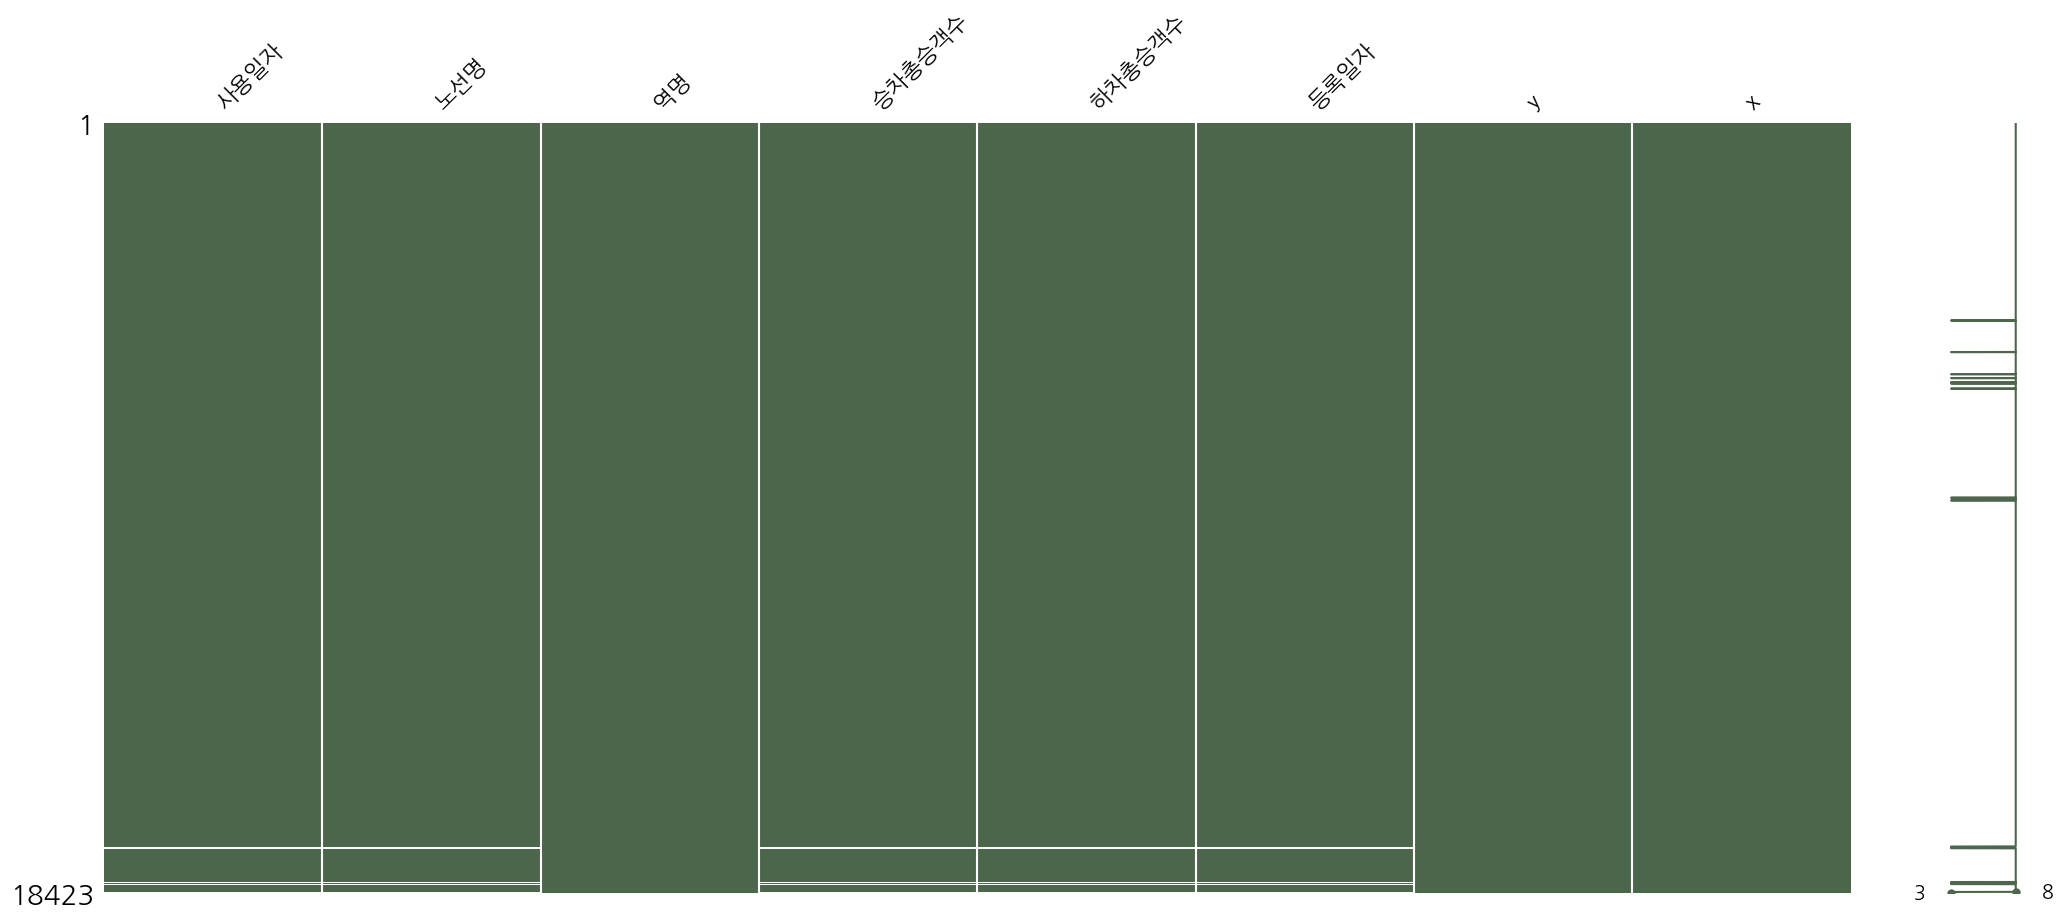

In [245]:
msno.matrix(df=subway_station_data1,color=(0.3,0.4,0.3))
plt.show()

In [246]:
subway_station_data2 = subway_station.merge(subway_pos,how='left',left_on='역명',right_on='역명')
display(subway_station_data2)
# 승객 데이터는 있지만 좌표데이터가 없는 경우이다.
# display(only_ss)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,y,x
0,20191201,1호선,종각,19093.0,17141.0,20191204,37.570161,126.982923
1,20191201,1호선,종로3가,19646.0,17772.0,20191204,37.571607,126.991806
2,20191201,1호선,종로5가,13716.0,13149.0,20191204,37.570926,127.001849
3,20191201,1호선,동대문,11040.0,13079.0,20191204,37.571420,127.009745
4,20191201,1호선,신설동,8498.0,8322.0,20191204,37.575297,127.025087
...,...,...,...,...,...,...,...,...
18328,20191231,9호선,사평,3525.0,3391.0,20200103,37.504206,127.015259
18329,20191231,9호선,신논현,38032.0,38915.0,20200103,37.504598,127.025060
18330,20191231,공항철도 1호선,서울역,15568.0,13292.0,20200103,37.554648,126.972559
18331,20191231,공항철도 1호선,공덕,2488.0,3261.0,20200103,37.544018,126.951592


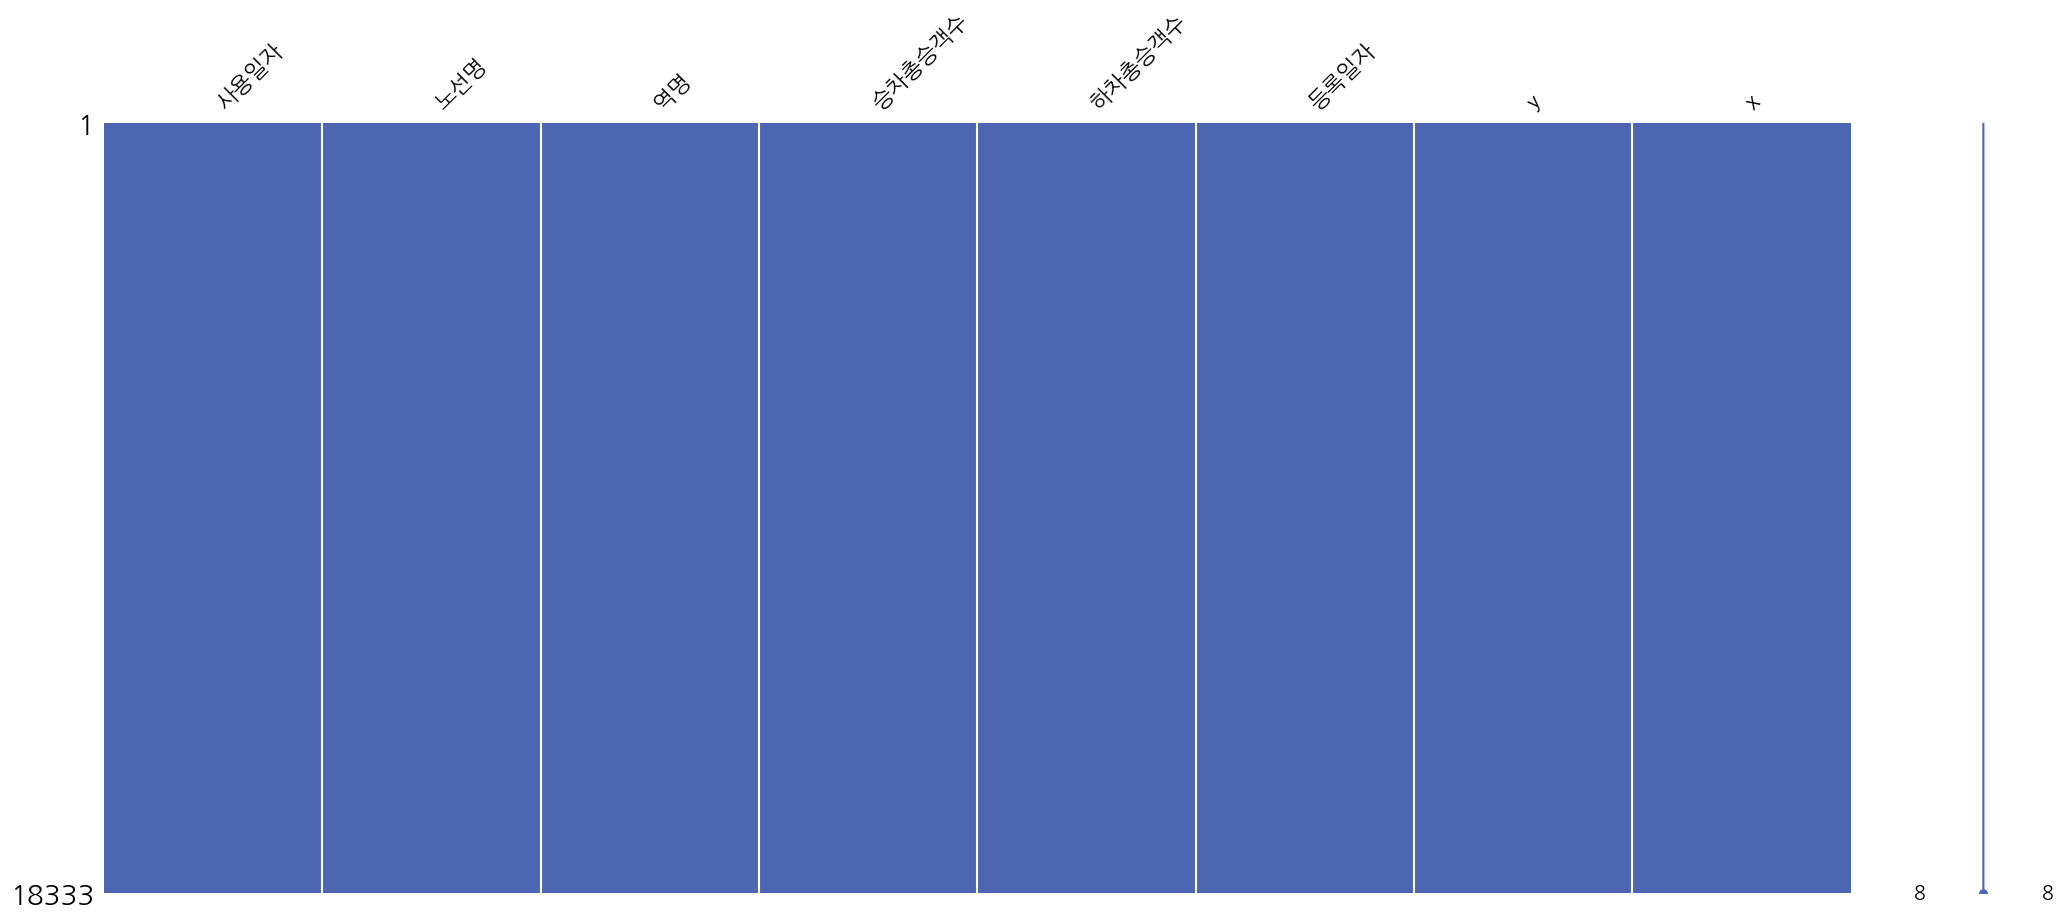

In [247]:
# 데이터는 있으나 좌표가 없는 데이터들은 좌표를 채워줄 수 있도록 한다.
msno.matrix(df=subway_station_data2,color=(0.3,0.4,0.7))
plt.show()

In [248]:
# only_ss_data = subway_station[subway_station['역명'].isin(only_ss)]
# station = only_ss_data[['노선명','역명']]
# station.to_csv('have_to_get_station_pos.csv')

In [249]:
subway_station_data = subway_station.merge(subway_pos,left_on='역명',right_on='역명')
display(subway_station_data)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,y,x
0,20191201,1호선,종각,19093.0,17141.0,20191204,37.570161,126.982923
1,20191202,1호선,종각,48153.0,46770.0,20191205,37.570161,126.982923
2,20191203,1호선,종각,49696.0,47715.0,20191206,37.570161,126.982923
3,20191204,1호선,종각,49877.0,48664.0,20191207,37.570161,126.982923
4,20191205,1호선,종각,51426.0,49816.0,20191208,37.570161,126.982923
...,...,...,...,...,...,...,...,...
18328,20191227,우이신설선,정릉,5109.0,4599.0,20191230,37.602798,127.013490
18329,20191228,우이신설선,정릉,4261.0,3645.0,20191231,37.602798,127.013490
18330,20191229,우이신설선,정릉,3056.0,2650.0,20200101,37.602798,127.013490
18331,20191230,우이신설선,정릉,4607.0,4345.0,20200102,37.602798,127.013490


In [254]:
subway_station_sum = subway_station_data.groupby(['역명','x','y']).sum().reset_index()
subway_station_sum

,역명,x,y,사용일자,승차총승객수,하차총승객수,등록일자
0,4.19민주묘지,127.013693,37.649699,625927696,94274.0,90088.0,625954396
1,가능,127.044213,37.748577,625927696,215913.0,202263.0,625954396
2,가락시장,127.118234,37.492522,1251855392,589791.0,621828.0,1251908792
3,가산디지털단지,126.882343,37.481072,1251855392,1718097.0,1795474.0,1251908792
4,가양,126.854456,37.561391,625927696,658051.0,634697.0,625954396
...,...,...,...,...,...,...,...
504,회기,127.057583,37.589460,625927696,915524.0,878221.0,625954396
505,회룡,127.046895,37.724846,625927696,419474.0,404504.0,625954396
506,회현,126.978246,37.558514,625927696,944745.0,1003372.0,625954396
507,효창공원앞,126.961351,37.539261,1251855392,317606.0,308987.0,1251908792


In [255]:
subway_station_sum.drop(['사용일자','등록일자'],axis=1,inplace=True)

In [256]:
subway_station_sum['월평균승차총승객수'] = subway_station_sum['승차총승객수'] / 31
subway_station_sum['월평균하차총승객수'] = subway_station_sum['하차총승객수'] / 31

In [257]:
subway_station_sum.head()

,역명,x,y,승차총승객수,하차총승객수,월평균승차총승객수,월평균하차총승객수
0,4.19민주묘지,127.013693,37.649699,94274.0,90088.0,3041.096774,2906.064516
1,가능,127.044213,37.748577,215913.0,202263.0,6964.935484,6524.612903
2,가락시장,127.118234,37.492522,589791.0,621828.0,19025.516129,20058.967742
3,가산디지털단지,126.882343,37.481072,1718097.0,1795474.0,55422.483871,57918.516129
4,가양,126.854456,37.561391,658051.0,634697.0,21227.451613,20474.096774


In [258]:
subway_station_sum.to_csv('지하철 승하차 수(좌표포함).csv')

In [259]:
subway_station_sum[['승차총승객수','하차총승객수']].agg(['min','max','mean','std'])

,승차총승객수,하차총승객수
min,1.688000e+03,1.252000e+03
max,3.389351e+06,3.370671e+06
mean,4.608544e+05,4.590838e+05
std,4.955092e+05,5.076038e+05


In [260]:
# Create a base map
# 지하철 역의 분포를 보여줌....

m_5 = folium.Map(location=[37.5665,126.9780], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()
for idx, row in subway_station_sum.iterrows():
    if not math.isnan(row['x']) and not math.isnan(row['y']):
        mc.add_child(Marker([row['y'], row['x']],popup=row['역명'],tooltip=row['승차총승객수']))
m_5.add_child(mc)

# r,g,b,lime
# gradient = {100000:'lime',200000:'skyblue',300000:'red',400000:'green',500000:'blue'}
# Add a heatmap to the base map
HeatMap(data=subway_station_sum[['y', 'x']], radius=10).add_to(m_5)

# Display the map
m_5